In [1]:
import os
os.chdir("../Figure4")

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rt = pd.read_csv("running_times.csv", sep=',')
rt = rt.query("dataset != 'DS-PBBC1'")

In [4]:
max_vals = rt.groupby("method")['seqs_per_sec'].max()

In [5]:
max_vals

method
BLAST               2.294125
DeepCOI_mcm        39.945031
DeepCOI_no_mcm    188.947897
RDP                38.845760
Name: seqs_per_sec, dtype: float64

/tmp/ipykernel_2140736/2715664119.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(['DeepCOI\n(w/o MCM)', 'DeepCOI\n(w/ MCM)', 'RDP', 'BLAST'])


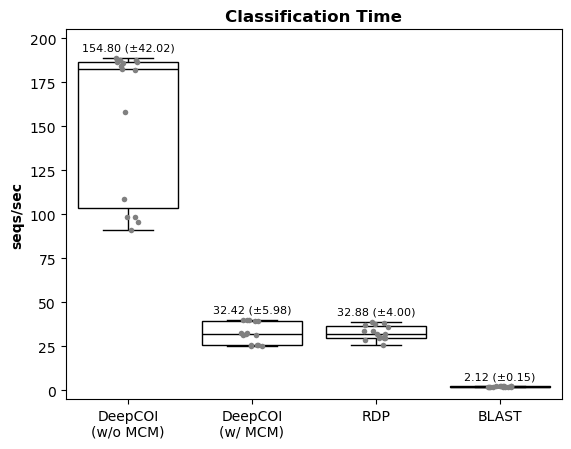

In [6]:
ax = sns.boxplot(data=rt,
    x='method', y='seqs_per_sec',
    color='white', linecolor='black',
    showfliers=False
)
ax = sns.stripplot(data=rt,
    x='method', y='seqs_per_sec',
    color='grey', jitter=True,
    size=4,
    ax=ax,
)
_ = ax.set_xlabel(None)
_ = ax.set_ylabel("seqs/sec", fontweight='bold')
_ = ax.set_xticklabels(['DeepCOI\n(w/o MCM)', 'DeepCOI\n(w/ MCM)', 'RDP', 'BLAST'])
_ = ax.set_title("Classification Time", fontweight='bold')
_ = ax.set_ylim((-5, 205))

means = [154.80, 32.42, 32.88, 2.12]
stdevs = [42.02, 5.98, 4.0, 0.15]
labels = [f"{m:.2f} (±{s:.2f})" for m, s in zip(means, stdevs)]
for xtick, method in zip(ax.get_xticks(), ['DeepCOI_no_mcm', 'DeepCOI_mcm', 'RDP', 'BLAST']):
    _ = ax.text(xtick, max_vals[method] + 4, labels[xtick],
            horizontalalignment='center', color='black',
            size=8,
        )
    
ax.figure.savefig("../Figures/Figure4.pdf", format='pdf', bbox_inches='tight')